In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
orig_img = cv2.imread("./predataset/eascii1.png", cv2.IMREAD_COLOR)
table = cv2.inRange(orig_img, (0, 0, 240), (0, 0, 255))
txtimg = cv2.inRange(orig_img, (0, 0, 0), (32, 32, 32))

print(table.max())

gray_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2GRAY)

table = cv2.bitwise_and(gray_img, gray_img, mask=table)
txtimg = cv2.bitwise_not(gray_img, mask=txtimg)

print(table.max())

txtimg_n = cv2.bitwise_not(txtimg)
#table = cv2.bitwise_and(table, txtimg_n)

ret, table = cv2.threshold(table, 5, 255, cv2.THRESH_BINARY)
ret, txtimg = cv2.threshold(txtimg, 180, 255, cv2.THRESH_BINARY)

cv2.imwrite("ee.png", table)

print(table.max())

pointList = np.array(table)
pointList = np.nonzero(pointList)

print(pointList)


255
76
255
(array([ 227,  227,  376, 3227]), array([  75, 2475,  224,   75]))


In [11]:
# boxStartPoint, boxEndPoint, rolMax, colMax
boxStartPoint = [pointList[1][0], pointList[0][0]]
boxEndPoint = [pointList[1][2], pointList[0][2]]
rolMax = [pointList[1][1], pointList[0][1]]
colMax = [pointList[1][3], pointList[0][3]]

boxSize = [boxEndPoint[0] - boxStartPoint[0], boxEndPoint[1] - boxStartPoint[1]]

rolMaxCount = int((rolMax[0] - boxStartPoint[0]) / boxSize[1])
colMaxCount = int((colMax[1] - boxStartPoint[1]) / boxSize[1])

print(boxSize)
print(rolMaxCount)
print(colMaxCount)

[149, 149]
16
20


In [22]:
textnum = int(input())
os.makedirs('dataset',exist_ok=True)
for d in range(colMaxCount):
    os.makedirs('dataset/'+str(textnum),exist_ok=True)
    for f in range(rolMaxCount):
        splitOne = txtimg[boxStartPoint[1]+(boxSize[1]*d):boxEndPoint[1]+(boxSize[1]*d), boxStartPoint[0]+(boxSize[0]*f):boxEndPoint[0]+(boxSize[0]*f)]
        print(str(d)+' '+str(f))
        rsSo = cv2.resize(splitOne, dsize=(28,28), interpolation=cv2.INTER_LINEAR)
        cv2.imwrite('dataset/'+str(textnum)+'/'+str(f)+'.png', rsSo)
    textnum += 1

TypeError: unsupported operand type(s) for +: 'int' and 'str'

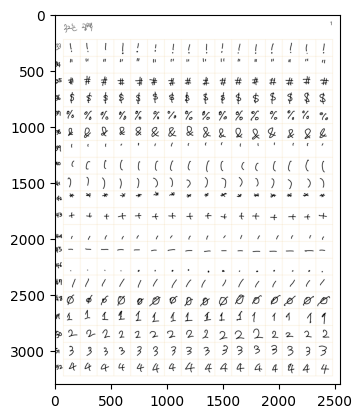

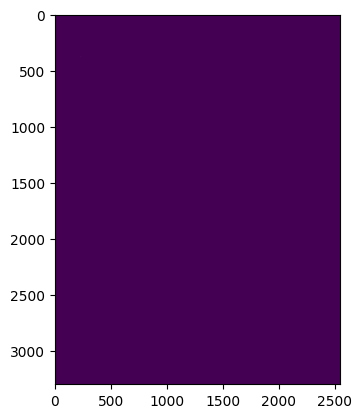

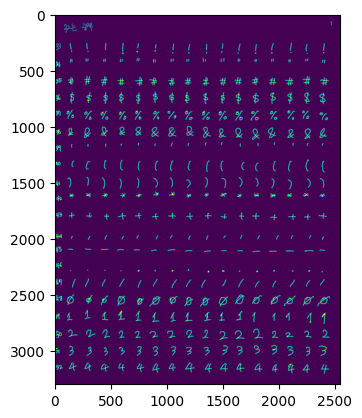

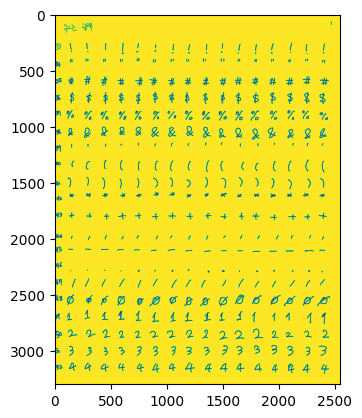

: 

In [7]:
plt.imshow(orig_img)
plt.show()
plt.imshow(table)
plt.show()
plt.imshow(txtimg)
plt.show()

plt.imshow(txtimg_n)
plt.show()

In [4]:
cv2.imwrite("cc.png", txtimg)

True